In [549]:
import matplotlib.pyplot as plt
import math
from random import randrange

In [550]:
class Node:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.node_id = -1
        self.g_cost = math.inf
        self.h_cost = math.inf
        self.f_cost = math.inf
        self.is_obstacle = False
        self.is_visited = False
        self.parent = None
        
        # Strictly for visualization purposes
        self.is_start = False
        self.is_goal = False
        
    def __eq__(self, other):
        return self.node_id == other.node_id

In [551]:
class Map:
    def __init__(self, height, width):
        self.height = height
        self.width = width
        self.map = []
    
    def create_map(self):
        k = 0
        for x in range(self.width):
            row = []
            for y in range(self.height):
                node = Node()
                node.x = x
                node.y = y
                node.node_id = k
                k = k + 1
                row.append(node)
            self.map.append(row)
        
    def create_obstacles(self, obstacles):
        for obstacle in obstacles:
            if not self.map[obstacle['x']][obstacle['y']].is_start and \
               not self.map[obstacle['x']][obstacle['y']].is_goal:
                self.map[obstacle['x']][obstacle['y']].is_obstacle = True
            
    def get_node(self, x, y):
        return self.map[x][y]
        
    def display_map(self):
        for i in range(self.width):
            for j in range(self.height):
                if self.map[i][j].is_obstacle:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'rs')
                elif self.map[i][j].is_start:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'b+')
                elif self.map[i][j].is_goal:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'm*')
                else:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'g.')

        plt.show()
        
    def plot_path(self, x_path, y_path):
        for i in range(self.width):
            for j in range(self.height):
                if self.map[i][j].is_obstacle:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'rs')
                elif self.map[i][j].is_start:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'b+')
                elif self.map[i][j].is_goal:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'm*')
                else:
                    plt.plot(self.map[i][j].x, self.map[i][j].y, 'g.')
        
        plt.plot(x_path, y_path, 'k-')
        plt.show()

In [552]:
class Astar:
    def __init__(self, map):
        self.open_list = []
        self.closed_list = []
        self.map = map
        
    def reconstruct_path(self, goal):
        x_path = []
        y_path = []
        
        current = goal
        while not current is None:
            x_path.append(current.x)
            y_path.append(current.y)
            current = current.parent
        
        self.map.plot_path(x_path, y_path)
    
    def calculate_euclidean_distance(self, node_1, node_2):
        return math.sqrt((node_1.x - node_2.x)**2 + (node_1.y - node_2.y)**2)
    
    def identify_neighbors(self, node):
        neighbors = []
        if node.x - 1 >= 0:
            neighbors.append(self.map.map[node.x - 1][node.y])
        if node.x + 1 <= self.map.width - 1:
            neighbors.append(self.map.map[node.x + 1][node.y])
        if node.y - 1 >= 0:
            neighbors.append(self.map.map[node.x][node.y - 1])
        if node.y + 1 <= self.map.height - 1:
            neighbors.append(self.map.map[node.x][node.y + 1])
        return neighbors

    def find_path(self, start, goal):
        self.open_list.clear()
        self.closed_list.clear()
        
        start.g_cost = 0
        start.h_cost = self.calculate_euclidean_distance(start, goal)
        start.f_cost = self.calculate_euclidean_distance(start, goal)
        
        self.open_list.append(start)
        
        while len(self.open_list) > 0:
            self.open_list = sorted(self.open_list, key=lambda x: x.f_cost, reverse=False)
            
            while len(self.open_list) > 0 and self.open_list[0].is_visited:
                self.open_list.pop(0)
            
            if len(self.open_list) == 0:
                break
                
            current = self.open_list[0]
            current.is_visited = True
            
            for neighbor in self.identify_neighbors(current):
                if not neighbor.is_visited and not neighbor.is_obstacle:
                    self.open_list.append(neighbor)
                    
                tentative_g_cost = current.g_cost + 1
                if tentative_g_cost < neighbor.g_cost:
                    neighbor.parent = current
                    neighbor.g_cost = tentative_g_cost
                    neighbor.f_cost = neighbor.g_cost + self.calculate_euclidean_distance(neighbor, goal)
        
        self.reconstruct_path(goal)

In [563]:
map = Map(15,15)
map.create_map()

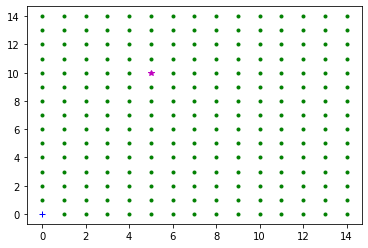

In [565]:
start = map.get_node(0, 0)
start.is_start = True

goal = map.get_node(5, 10)
goal.is_goal = True
    
map.display_map()

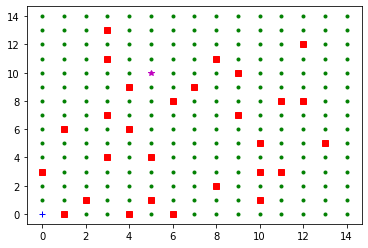

In [566]:
n_obstacles = 30
for _ in range(n_obstacles):
    map.create_obstacles([{'x': randrange(0, map.width - 1, 1), 'y': randrange(0, map.height - 1, 1)}])

map.display_map()

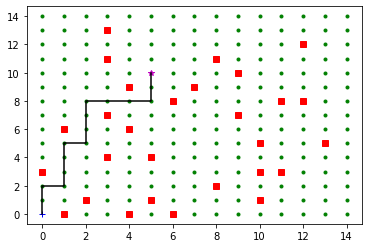

In [567]:
astar = Astar(map)
astar.find_path(start, goal)